<a href="https://colab.research.google.com/github/ab17254/ce802/blob/main/CE802_P2_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree, metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving CE802_P2_Data.csv to CE802_P2_Data.csv
Saving CE802_P2_Test.csv to CE802_P2_Test.csv
User uploaded file "CE802_P2_Data.csv" with length 119990 bytes
User uploaded file "CE802_P2_Test.csv" with length 113062 bytes


In [3]:
data = pd.read_csv('/content/CE802_P2_Data.csv')
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,11.7,4.02,-4.34,9.90,29.79,89.58,0.63,23,10.35,158.56,-7.88,0.03,1,1.96,NaN,False
1,11.7,4.20,-3.68,10.98,17.46,179.58,0.05,11,8.30,110.56,-3.10,0.84,1,1.50,NaN,False
2,37.7,25.80,3.60,0.48,12.24,407.58,-0.29,230,4.06,254.56,6.68,21.60,10,7.63,NaN,True
3,7.7,5.40,0.30,9.42,19.86,119.58,0.29,12,7.61,66.56,-1.84,1.05,1,2.27,12.17,True
4,15.7,5.58,-2.58,16.34,17.49,146.58,-0.64,25,9.86,106.56,-4.36,1.68,1,1.28,NaN,False


In [4]:
data.dtypes

F1       float64
F2       float64
F3       float64
F4       float64
F5       float64
F6       float64
F7       float64
F8         int64
F9       float64
F10      float64
F11      float64
F12      float64
F13        int64
F14      float64
F15      float64
Class       bool
dtype: object

In [5]:
cleanup = {'Class': {False: 0, True:1}}
data.replace(cleanup, inplace=True)
data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,11.7,4.02,-4.34,9.90,29.79,89.58,0.63,23,10.35,158.56,-7.88,0.03,1,1.96,NaN,0
1,11.7,4.20,-3.68,10.98,17.46,179.58,0.05,11,8.30,110.56,-3.10,0.84,1,1.50,NaN,0
2,37.7,25.80,3.60,0.48,12.24,407.58,-0.29,230,4.06,254.56,6.68,21.60,10,7.63,NaN,1
3,7.7,5.40,0.30,9.42,19.86,119.58,0.29,12,7.61,66.56,-1.84,1.05,1,2.27,12.17,1
4,15.7,5.58,-2.58,16.34,17.49,146.58,-0.64,25,9.86,106.56,-4.36,1.68,1,1.28,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,37.7,33.90,5.80,6.62,10.71,362.58,-1.52,165,5.52,444.56,-1.96,15.30,10,6.93,8.76,0
1496,17.7,29.40,8.00,-0.48,3.54,-102.42,1.17,100,3.76,304.56,6.78,29.25,10,7.53,12.19,1
1497,11.7,2.13,-0.92,12.12,22.65,95.58,-0.57,10,8.47,76.56,-4.76,2.34,1,1.89,NaN,1
1498,11.7,2.94,0.64,11.68,17.49,146.58,1.47,20,8.57,116.56,-5.00,2.67,1,1.48,11.55,0


In [6]:
data['F15'].fillna(data['F15'].mean(), inplace=True)

In [58]:
features = {'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15'}

In [59]:
x = data.loc[:, features].to_numpy()
y = data.loc[:, 'Class'].to_numpy()
print(x.shape, y.shape)

(1500, 15) (1500,)


In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=42)

In [67]:
# DT with F15 included
clf = DecisionTreeClassifier(random_state=0, max_depth=, criterion='entropy')
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[184  21]
 [ 46 124]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       205
           1       0.86      0.73      0.79       170

    accuracy                           0.82       375
   macro avg       0.83      0.81      0.82       375
weighted avg       0.83      0.82      0.82       375

Accuracy: 0.8213333333333334


In [91]:
# DT with 15 included and cross validation
parameters = {'max_depth': range(3,20)}
clf_gscv = GridSearchCV(DecisionTreeClassifier(), param_grid=parameters, n_jobs=4)
clf_gscv.fit(x_train, y_train)
best_model = clf_gscv.best_estimator_
print(clf_gscv.best_score_, clf_gscv.best_params_)

0.8026666666666665 {'max_depth': 7}


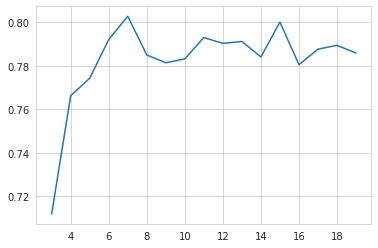

In [99]:
plt.plot(np.arange(3,20), clf_gscv.cv_results_['mean_test_score'])

In [89]:
# DT with 15 included and cross validation in for loop without GridSearchCV
depth = []
for i in range(3,20):
  clf_ = DecisionTreeClassifier(max_depth=i)
  scores = cross_val_score(estimator=clf_, X=x_train, y=y_train, cv=10, n_jobs=4)
  depth.append((i,scores.mean()))
print(depth)

[(3, 0.7146412768647282), (4, 0.7742493678887484), (5, 0.7813290139064476), (6, 0.7884323640960809), (7, 0.7981984829329962), (8, 0.7981431731984829), (9, 0.7990123261694058), (10, 0.7972029077117572), (11, 0.7928176359039191), (12, 0.7928413400758533), (13, 0.8061709860935524), (14, 0.7981826801517067), (15, 0.79551201011378), (16, 0.7945875474083439), (17, 0.7972661188369153), (18, 0.7937025916561316), (19, 0.792817635903919)]


In [88]:
# knn classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
print(confusion_matrix(y_test, pred_knn))
print(classification_report(y_test, pred_knn))

[[132  73]
 [ 67 103]]
              precision    recall  f1-score   support

           0       0.66      0.64      0.65       205
           1       0.59      0.61      0.60       170

    accuracy                           0.63       375
   macro avg       0.62      0.62      0.62       375
weighted avg       0.63      0.63      0.63       375



In [94]:
# knn classifier with param tuning
knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1,25)}
knn_cv = GridSearchCV(knn2, param_grid, cv=10)
knn_cv.fit(x_train, y_train)
print(knn_cv.best_score_)
print(knn_cv.best_params_)
pred_knn2 = knn_cv.predict(x_test)
print(classification_report(y_test, pred_knn2))
print(confusion_matrix(y_test, pred_knn2))

0.6497945638432364
{'n_neighbors': 23}
              precision    recall  f1-score   support

           0       0.70      0.69      0.69       205
           1       0.63      0.64      0.64       170

    accuracy                           0.67       375
   macro avg       0.66      0.66      0.66       375
weighted avg       0.67      0.67      0.67       375

[[141  64]
 [ 61 109]]


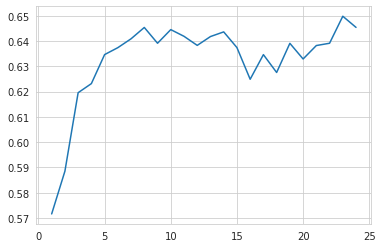

In [97]:
sns.set_style('whitegrid')
plt.plot(np.arange(1,25), knn_cv.cv_results_['mean_test_score'])

In [ ]:
# svc classifier